In [18]:
import numpy
import pandas as pd
import numpy as np

data_dir = "../Data/"
data = pd.read_csv(data_dir + "synop.csv")
data_=data.loc[data['numer_sta'] < 10000]

Quelles sont les stations les plus humides ?
Y a t il une corrélation entre l'humidité et la température ?

In [12]:
humidity=data.groupby('numer_sta')['u'].agg('mean').sort_values(ascending=False)
print(humidity)
correlation=data['u'].corr(data['t'])
print(correlation)

numer_sta
81401    85.643139
7110     84.984380
81405    84.701715
71805    84.369475
61997    83.767886
           ...    
7690     65.687083
7591     62.686538
7747     61.880241
89642    60.163052
7661           NaN
Name: u, Length: 62, dtype: float64
-0.277400971501697


Quels sont les stations qui ont eu le plus de précipitations durant la saison d’hiver et d’automne sur 2023 ? 
Quelle est leur niveau d’exposition au soleil les plus exposés au soleil ?

In [52]:
#Retourne vrai si la date est en hiver ou en automne: pas entre le 19 mars et le 24 septembre
def enAutomneHiver(date):
    return not (319 > int(str(date)[5:8]) > 824)

stations_automne_hiver=pd.DataFrame([data.loc[i, ['numer_sta', 'rr3', 'n']] for i in range(len(data)) if enAutomneHiver(data['date'][i]) and data['numer_sta'][i] < 10000])
stations_automne_hiver

,numer_sta,rr3,n
0,7005.0,-0.1,NaN
1,7015.0,-0.1,100.0
2,7020.0,3.6,100.0
3,7027.0,0.2,100.0
4,7037.0,-0.1,100.0
...,...,...,...
190542,7661.0,NaN,NaN
190543,7690.0,0.0,25.0
190544,7747.0,0.0,90.0
190545,7761.0,0.0,100.0


In [4]:
precipiations=stations_automne_hiver.groupby('numer_sta')[['rr3', 'n']].agg('mean').sort_values('rr3', ascending=False)
precipiations

NameError: name 'stations_automne_hiver' is not defined

In [54]:
top5_precipitations=precipiations.iloc[:5]

ensolleilement = stations_automne_hiver.groupby('numer_sta')['rr3'].agg('mean').sort_values(ascending=False)
ensolleilement = np.where(ensoleillement['numer_sta'] in top5_precipitations)

# ensoleillement=pd.DataFrame([data.loc[i, ['numer_sta', 'n']] for i in range(len(data)) if enAutomneHiver(data['date'][i]) and data['numer_sta'][i] in top5_precipitations])
# ensoleillement=top5_precipitations.groupby('numer_sta')['n'].agg('mean').sort_values(ascending=False)

TypeError: unhashable type: 'Series'

Quels sont les stations où le vent est le plus constant sur l’année et le plus fort ?

In [20]:
constance_du_vent=data_.groupby('numer_sta')['ff'].agg('std').sort_values()
constance_du_vent

numer_sta
7535    1.293800
7627    1.652043
7761    1.724852
7607    1.725696
7621    1.796415
7591    1.807126
7790    1.826980
7280    1.876265
7434    1.885920
7255    1.909944
7299    1.969656
7240    2.018483
7471    2.027739
7130    2.068587
7222    2.096944
7510    2.103677
7149    2.113341
7072    2.163510
7190    2.168712
7139    2.181675
7690    2.256475
7037    2.302044
7335    2.306757
7005    2.332682
7460    2.367829
7630    2.415139
7481    2.444826
7643    2.543489
7015    2.549511
7181    2.559169
7168    2.564137
7577    2.595419
7027    2.627914
7117    2.637410
7110    2.851374
7558    2.899812
7314    3.300675
7747    3.326560
7020    3.523149
7207    3.666770
7650    3.711655
7661    4.221894
Name: ff, dtype: float64

In [22]:
force_du_vent=data_.groupby('numer_sta')['ff'].agg('mean').sort_values()
force_du_vent

numer_sta
7627    2.219847
7535    2.238579
7607    2.308973
7591    2.551571
7471    2.822667
7621    2.879867
7790    2.908627
7299    2.973993
7460    3.131218
7761    3.195909
7280    3.208883
7255    3.283386
7190    3.304512
7510    3.492405
7577    3.493987
7434    3.558669
7139    3.576816
7072    3.634845
7222    3.655327
7481    3.700095
7005    3.700159
7240    3.700657
7130    3.746181
7630    3.871311
7149    3.949493
7335    4.090785
7643    4.115845
7690    4.137373
7168    4.152854
7181    4.403206
7558    4.549634
7747    4.563914
7037    4.611069
7015    4.618477
7027    4.691436
7650    4.693059
7110    5.019936
7117    5.273135
7314    5.876090
7661    6.212706
7207    6.598397
7020    7.150066
Name: ff, dtype: float64

In [56]:
data_desciptors=data_.loc[:, ['ff', 'u', 't']]
print(data_desciptors.shape)
data_desciptors = data_desciptors.dropna()
print(data_desciptors.shape)

(131636, 3)
(128181, 3)


In [57]:
from sklearn.cluster import MiniBatchKMeans

model=MiniBatchKMeans(n_clusters=5)
model=model.partial_fit(data_desciptors.loc[:data.shape[0]/2, :])
model=model.partial_fit(data_desciptors.loc[data.shape[0]/2:, :])
model.cluster_centers_

array([[  4.31276013,  39.23182324, 295.99393252],
       [  3.79716145,  76.35127668, 279.90569271],
       [  4.16086345,  60.94535451, 290.49582656],
       [  3.21348585,  94.06734218, 280.4591577 ],
       [  4.11096022,  84.87651767, 288.22400845]])

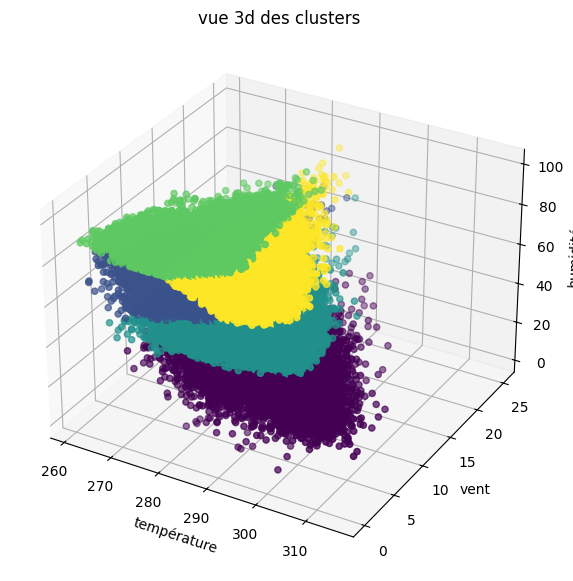

In [61]:
import matplotlib.pyplot as plt
y_kmeans=model.predict(data_desciptors)
                      
fig=plt.figure(figsize=(10,7))
ax=plt.axes(projection='3d')

ax.scatter3D(data_desciptors['t'], data_desciptors['ff'], data_desciptors['u'], c=y_kmeans)
ax.set_title('vue 3d des clusters')
ax.set_xlabel('température')
ax.set_ylabel('vent')
ax.set_zlabel('humidité')
plt.show()

In [66]:
data_desciptors['Classe_predite'] = y_kmeans

In [69]:
data_.shape

(131636, 59)